In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)
from Custom import (
    Matrix, 
    Summary, 
    All, 
    Knn_Greedy,
)

In [3]:
dataset = pd.read_csv('mushrooms.csv')


In [4]:
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [5]:
dataset.head()


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [6]:
dataset.tail()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [7]:
num_rows, num_cols = dataset.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)


Number of rows: 8124
Number of columns: 23


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [9]:
dataset.isnull().values.any()


False

In [10]:
for column in dataset.columns:
    unique_values = dataset[column].unique()
    print(f"number of unique values: {len(unique_values)}, Uniqu values are:'{column}': {unique_values}, ")


number of unique values: 2, Uniqu values are:'class': ['p' 'e'], 
number of unique values: 6, Uniqu values are:'cap-shape': ['x' 'b' 's' 'f' 'k' 'c'], 
number of unique values: 4, Uniqu values are:'cap-surface': ['s' 'y' 'f' 'g'], 
number of unique values: 10, Uniqu values are:'cap-color': ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r'], 
number of unique values: 2, Uniqu values are:'bruises': ['t' 'f'], 
number of unique values: 9, Uniqu values are:'odor': ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm'], 
number of unique values: 2, Uniqu values are:'gill-attachment': ['f' 'a'], 
number of unique values: 2, Uniqu values are:'gill-spacing': ['c' 'w'], 
number of unique values: 2, Uniqu values are:'gill-size': ['n' 'b'], 
number of unique values: 12, Uniqu values are:'gill-color': ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o'], 
number of unique values: 2, Uniqu values are:'stalk-shape': ['e' 't'], 
number of unique values: 5, Uniqu values are:'stalk-root': ['e' 'c' 'b' 'r' '?'], 
number of unique v

In [11]:
dataset.drop('veil-type', axis=1, inplace=True)

In [12]:
ds = dataset.copy()
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [13]:
column_mappings = {}
columns = dataset.columns

for column in columns:
    column_mapping = {label: idx for idx, label in enumerate(np.unique(dataset[column]))}
    ds[column] = dataset[column].map(column_mapping)


In [14]:
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int64
 1   cap-shape                 8124 non-null   int64
 2   cap-surface               8124 non-null   int64
 3   cap-color                 8124 non-null   int64
 4   bruises                   8124 non-null   int64
 5   odor                      8124 non-null   int64
 6   gill-attachment           8124 non-null   int64
 7   gill-spacing              8124 non-null   int64
 8   gill-size                 8124 non-null   int64
 9   gill-color                8124 non-null   int64
 10  stalk-shape               8124 non-null   int64
 11  stalk-root                8124 non-null   int64
 12  stalk-surface-above-ring  8124 non-null   int64
 13  stalk-surface-below-ring  8124 non-null   int64
 14  stalk-color-above-ring    8124 non-null 

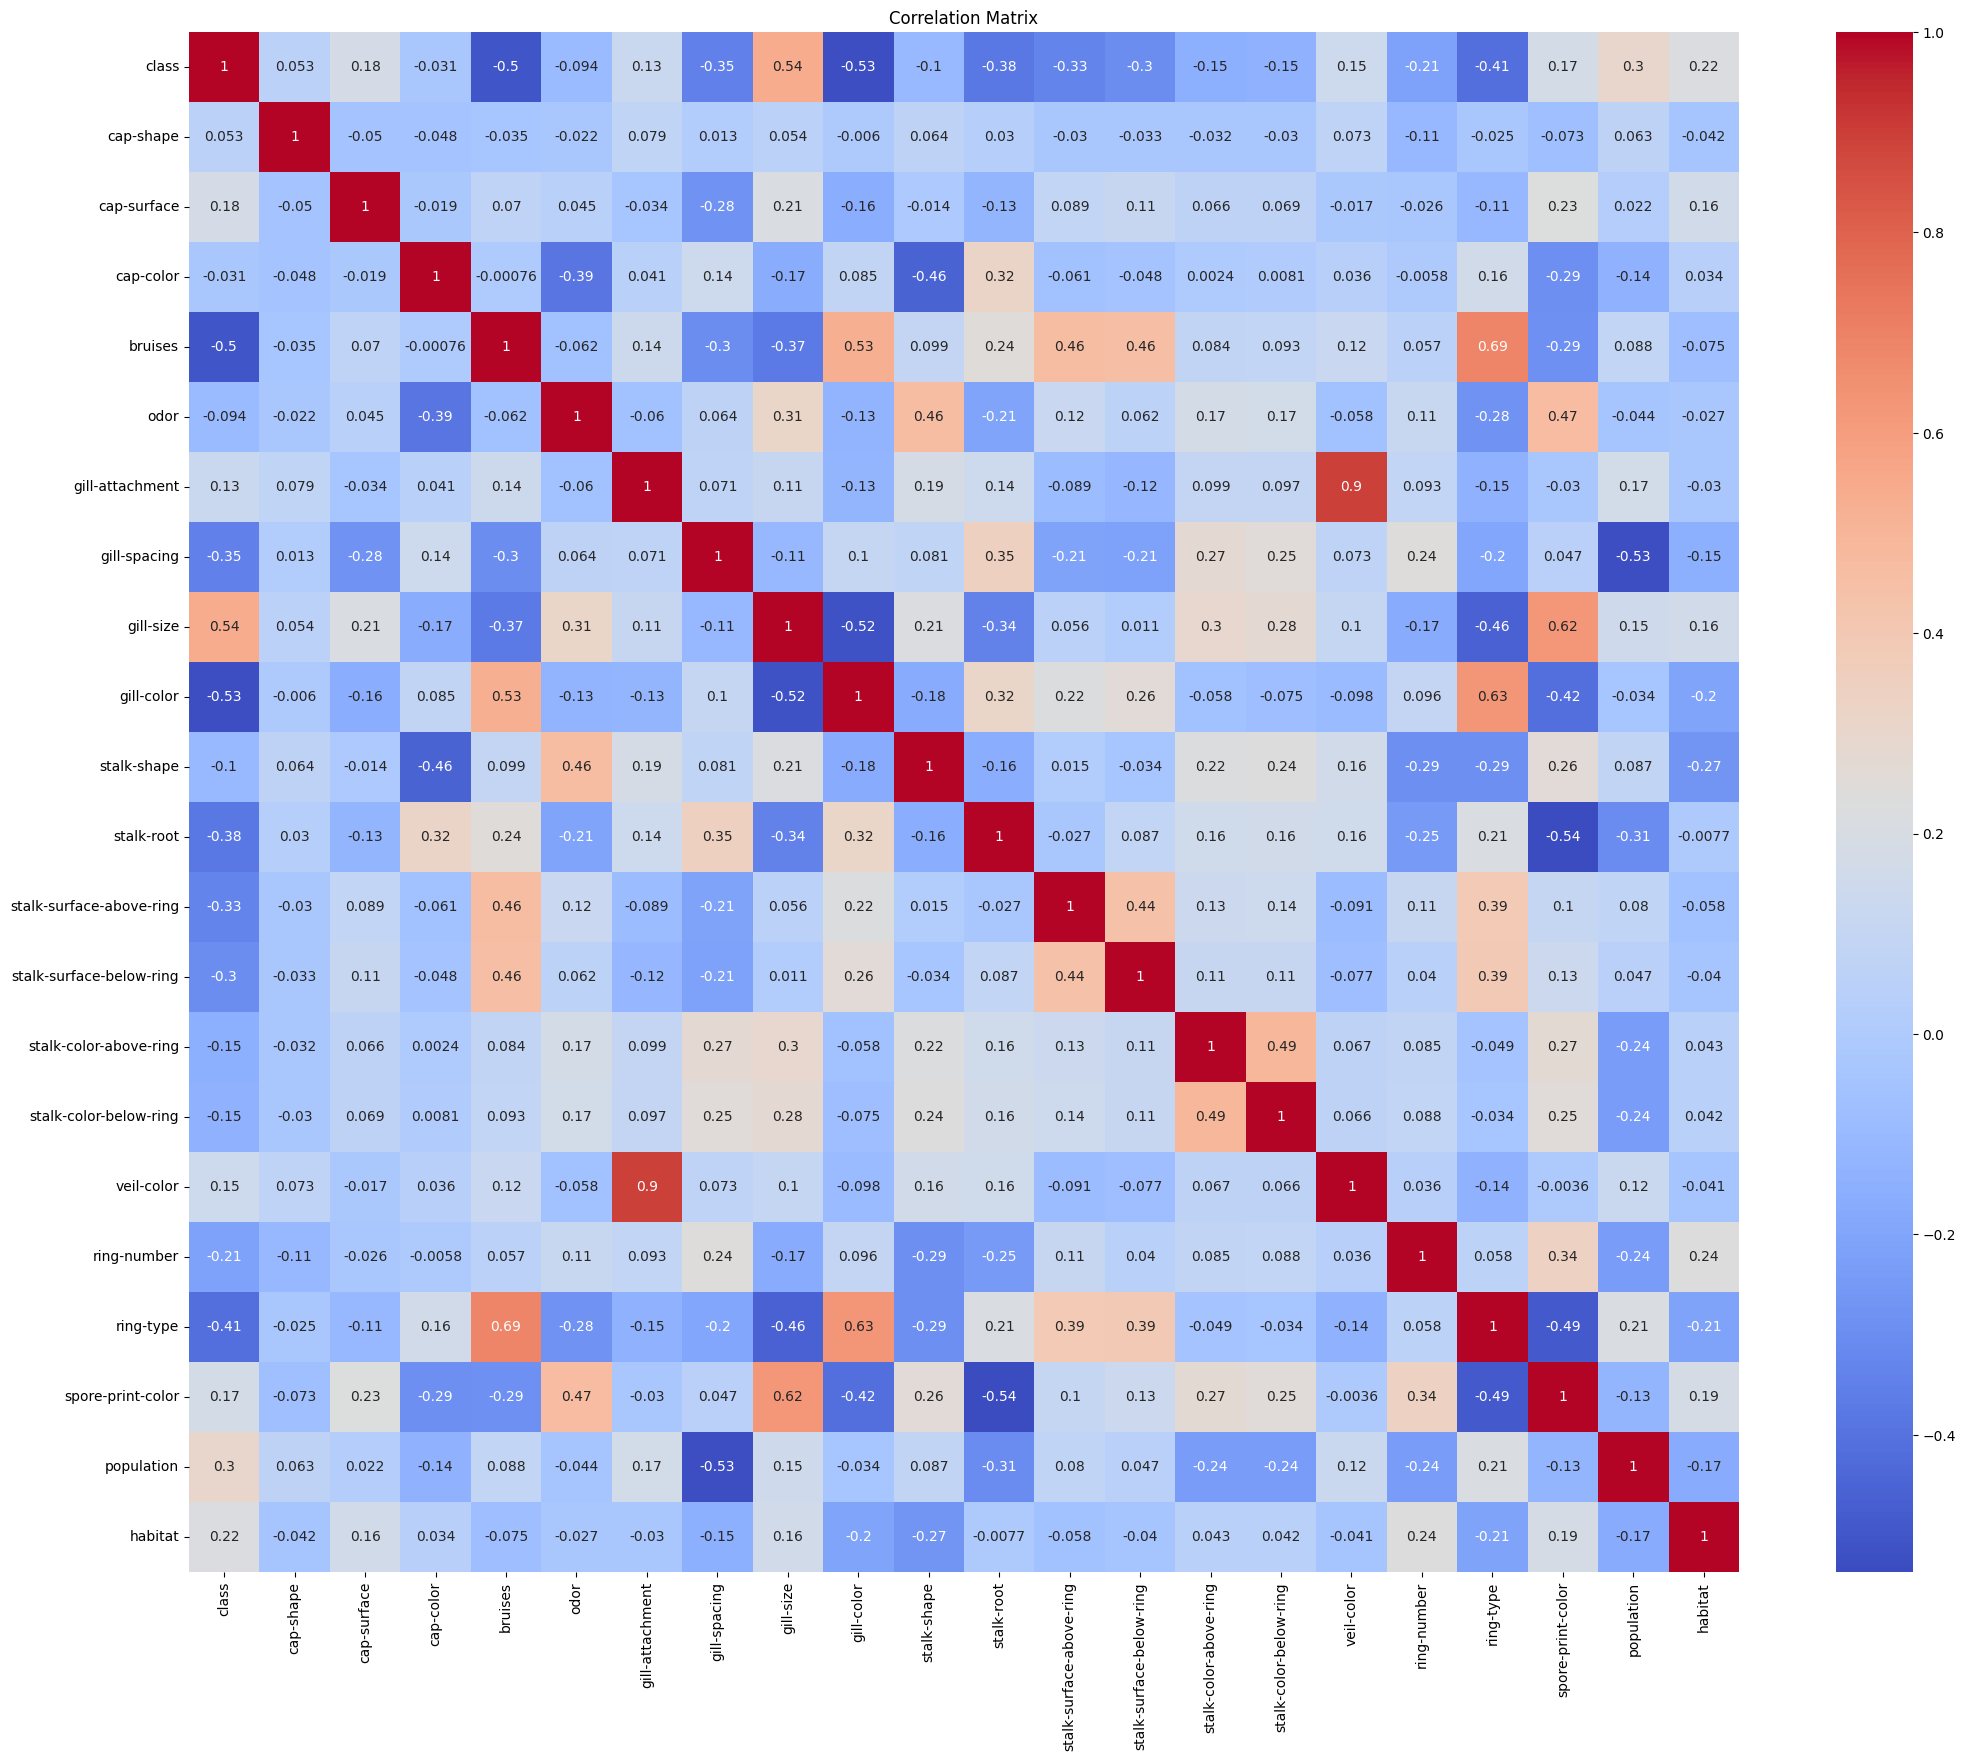

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = ds.corr()
plt.figure(figsize=(25,20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()



In [17]:
x = ds.drop('class', axis=1)
y = ds['class']

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [19]:
from sklearn.linear_model import LinearRegression

Lineer = LinearRegression()
Lineer.fit(x_train, y_train)
linner_test = Lineer.score(x_test, y_test)
linner_test

0.729071844331977

In [20]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train,y_train)
ridge_test = ridge.score(x_test, y_test)
ridge_test

0.7291543056978034

In [21]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train,y_train)
lasso_test = lasso.score(x_test, y_test)
lasso_test

-3.983770389126562e-06

In [22]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(x_train, y_train)
logistic_test = logistic.score(x_test, y_test)
logistic_test

0.9464615384615385

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       840
           1       0.95      0.94      0.94       785

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625
 
 F1 Score for Logistic Regression: 0.9464580061254111 
 Precision Score for Logistic Regression: 0.9464609335563453 
 Recall Score for Logistic Regression: 0.9464615384615385 
 Confusion Matrix for Logistic Regression: [[798  42]
 [ 45 740]]


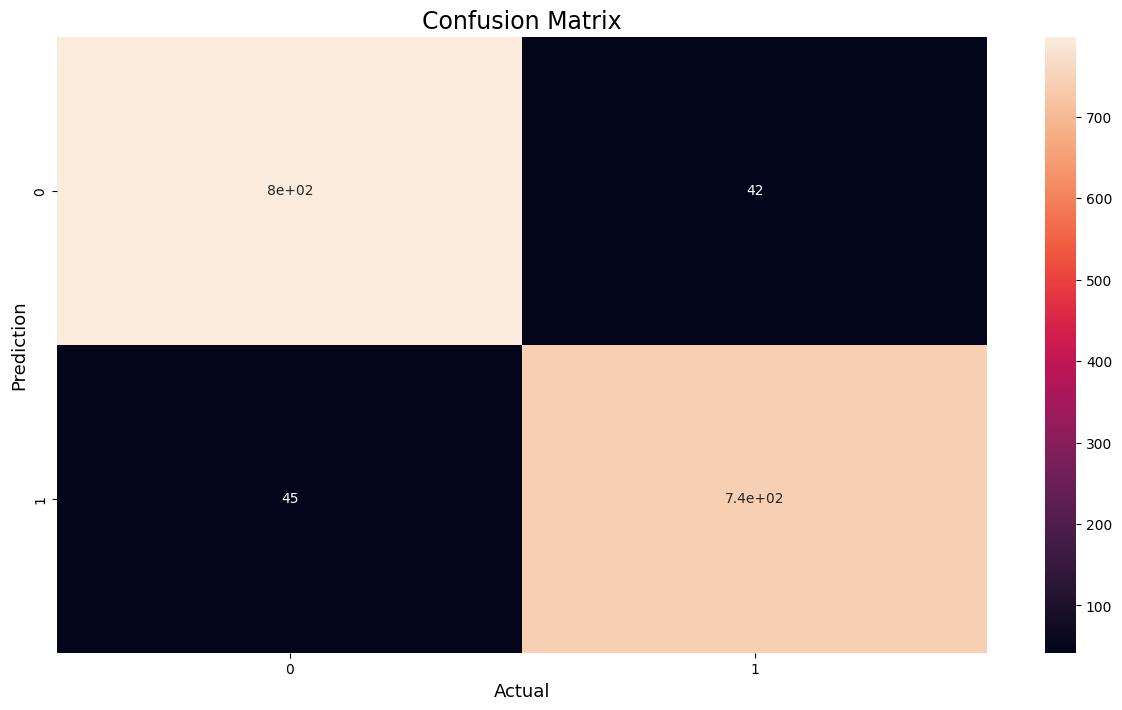

In [23]:
All("Logistic Regression",logistic.predict(x_test), y_test)

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_test = knn.score(x_test, y_test)
knn_test

0.9963076923076923

In [25]:
#!!!!!Çok uzun Sürüyor!!!!!!!
#Knn_Greedy(x_train,x_test,y_train,y_test,True,2)

In [26]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
svc_test = svc.score(x_test, y_test)
svc_test

0.9938461538461538

Classification Report for SVC:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       851
           1       0.99      1.00      0.99       774

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625
 
 F1 Score for SVC: 0.9938474425784544 
 Precision Score for SVC: 0.9938969733503321 
 Recall Score for SVC: 0.9938461538461538 
 Confusion Matrix for SVC: [[842   9]
 [  1 773]]


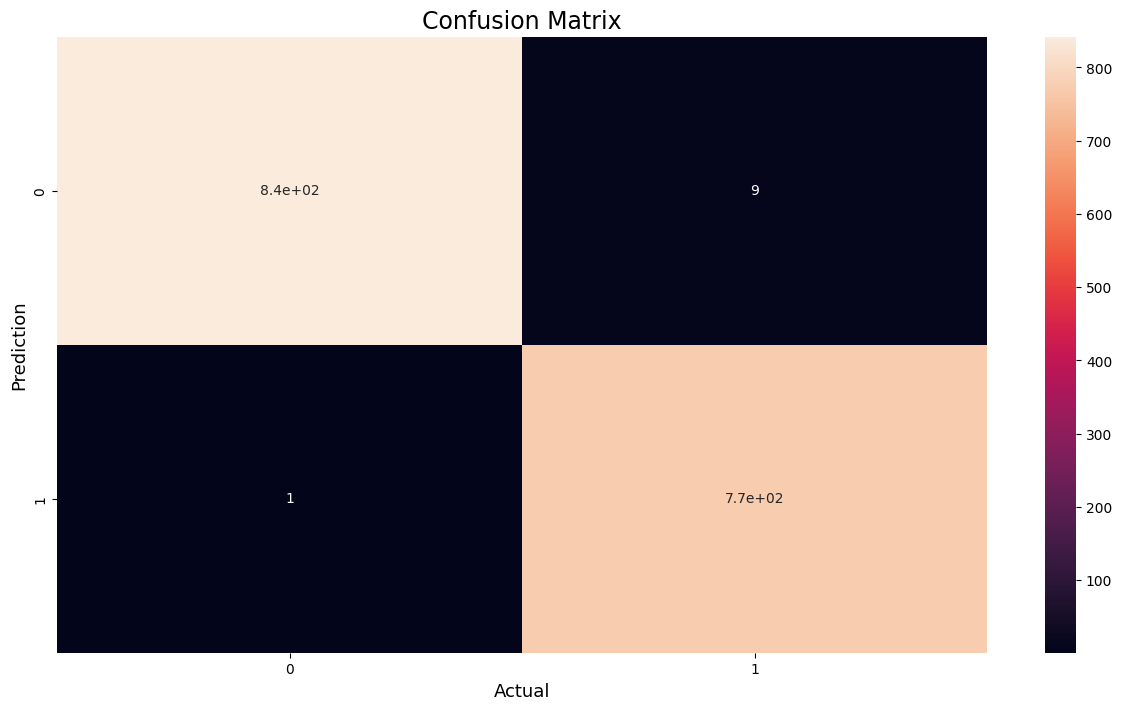

In [27]:
All("SVC",svc.predict(x_test), y_test)

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtc_gini = DecisionTreeClassifier(criterion='gini')
dtc_gini.fit(x_train, y_train)
dtc_gini_test = dtc_gini.score(x_test, y_test)
dtc_gini_test


1.0

Classification Report for Decision Tree (Gini):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 F1 Score for Decision Tree (Gini): 1.0 
 Precision Score for Decision Tree (Gini): 1.0 
 Recall Score for Decision Tree (Gini): 1.0 
 Confusion Matrix for Decision Tree (Gini): [[843   0]
 [  0 782]]


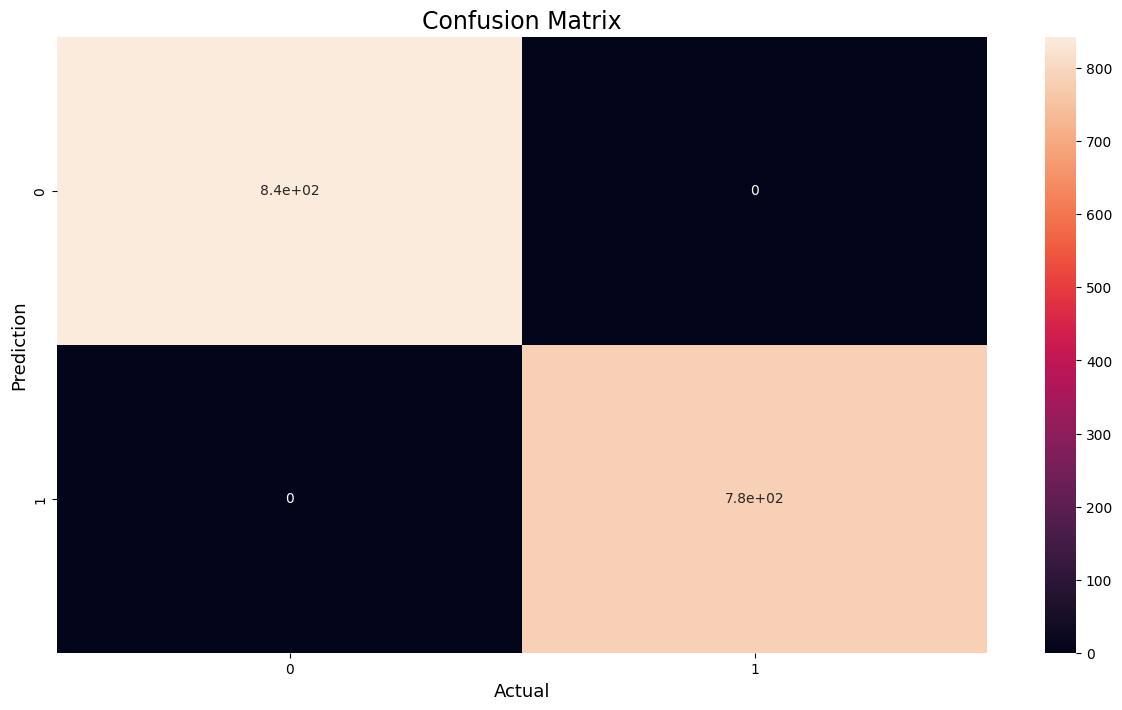

In [30]:
All("Decision Tree (Gini)",dtc_gini.predict(x_test), y_test)

In [31]:
from sklearn.tree import DecisionTreeClassifier

dtc_entropy = DecisionTreeClassifier(criterion='entropy')
dtc_entropy.fit(x_train, y_train)
dtc_entropy_test = dtc.score(x_test, y_test)
dtc_entropy_test


NameError: name 'dtc' is not defined

Classification Report for Decision Tree (Entropy):


               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 F1 Score for Decision Tree (Entropy): 1.0 
 Precision Score for Decision Tree (Entropy): 1.0 
 Recall Score for Decision Tree (Entropy): 1.0 
 Confusion Matrix for Decision Tree (Entropy): [[843   0]
 [  0 782]]


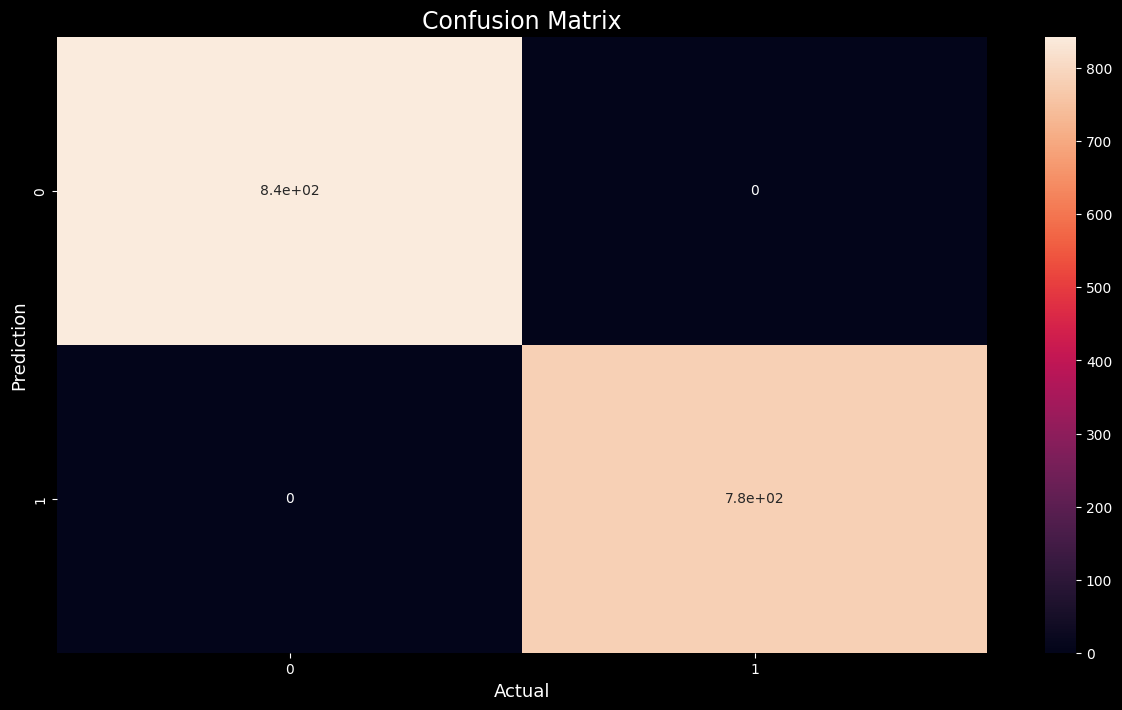

In [ ]:
All("Decision Tree (Entropy)",dtc_entropy.predict(x_test), y_test)

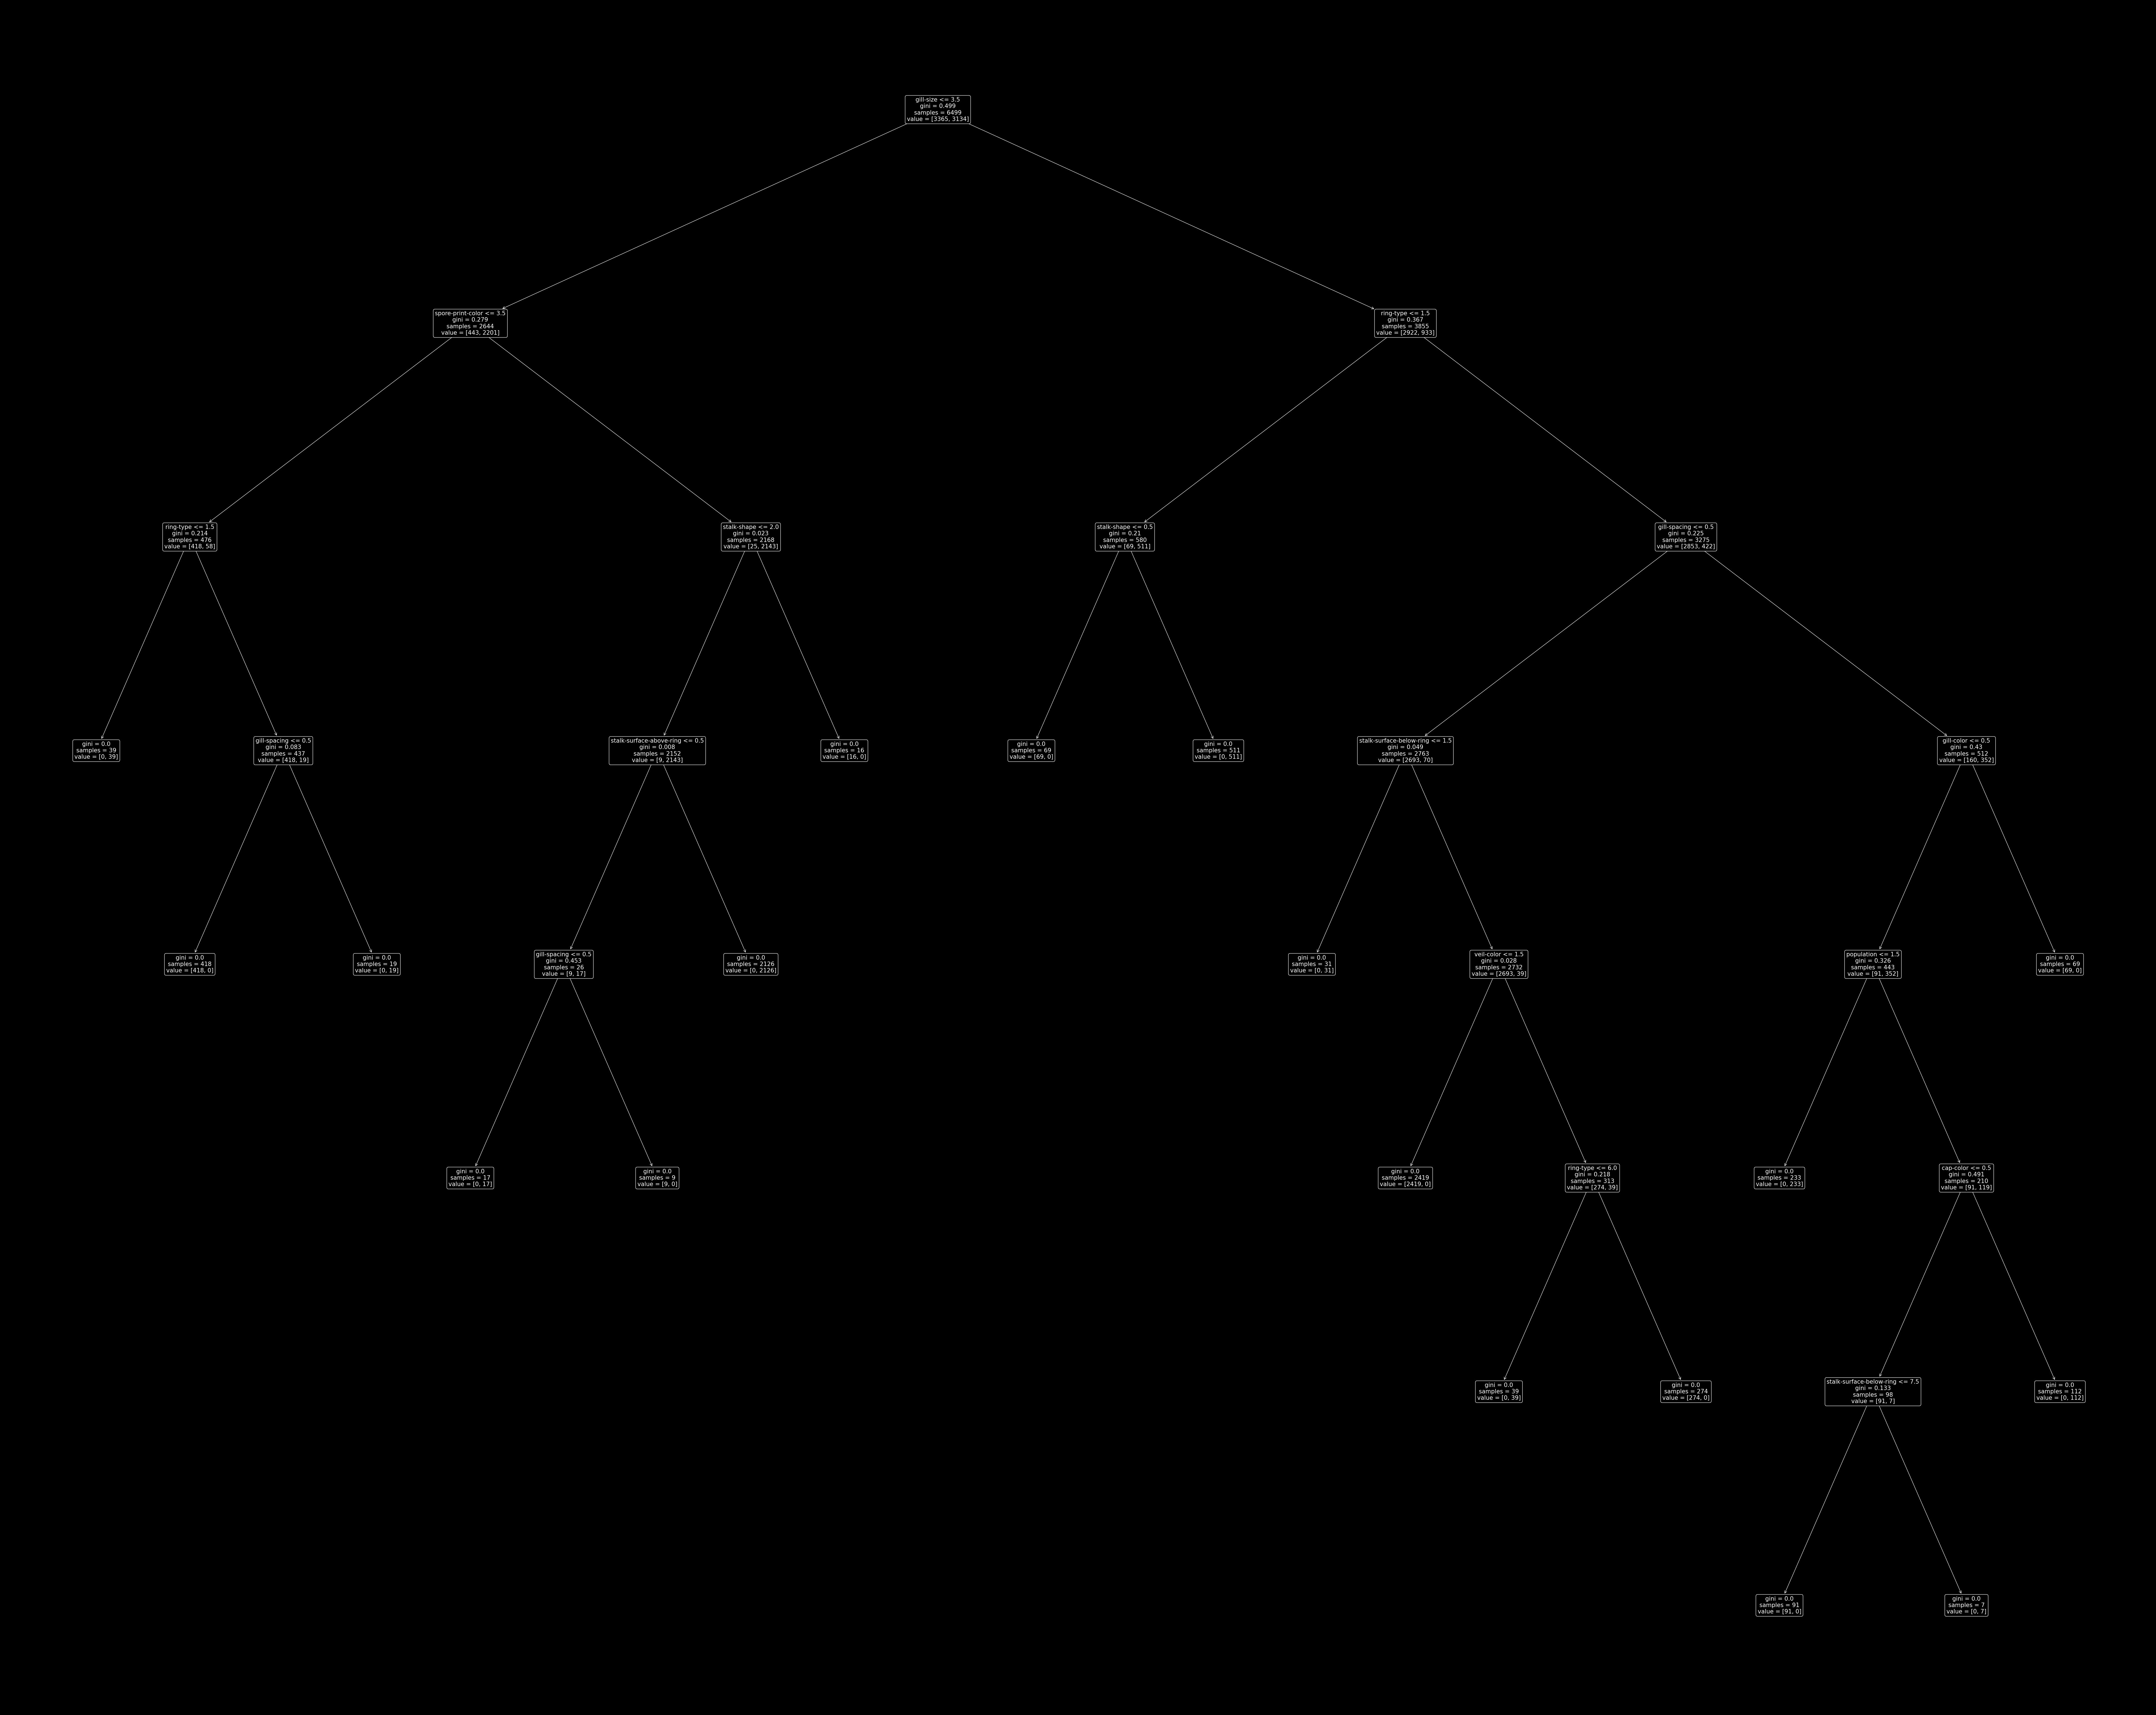

In [ ]:
from sklearn import tree
from matplotlib import pyplot
pyplot.style.use('dark_background')
fig = pyplot.figure(figsize=(100,80))
tree.plot_tree(dtc_gini, 
    feature_names=ds.columns,  
    fontsize=15, rounded=True,)
fig.show()

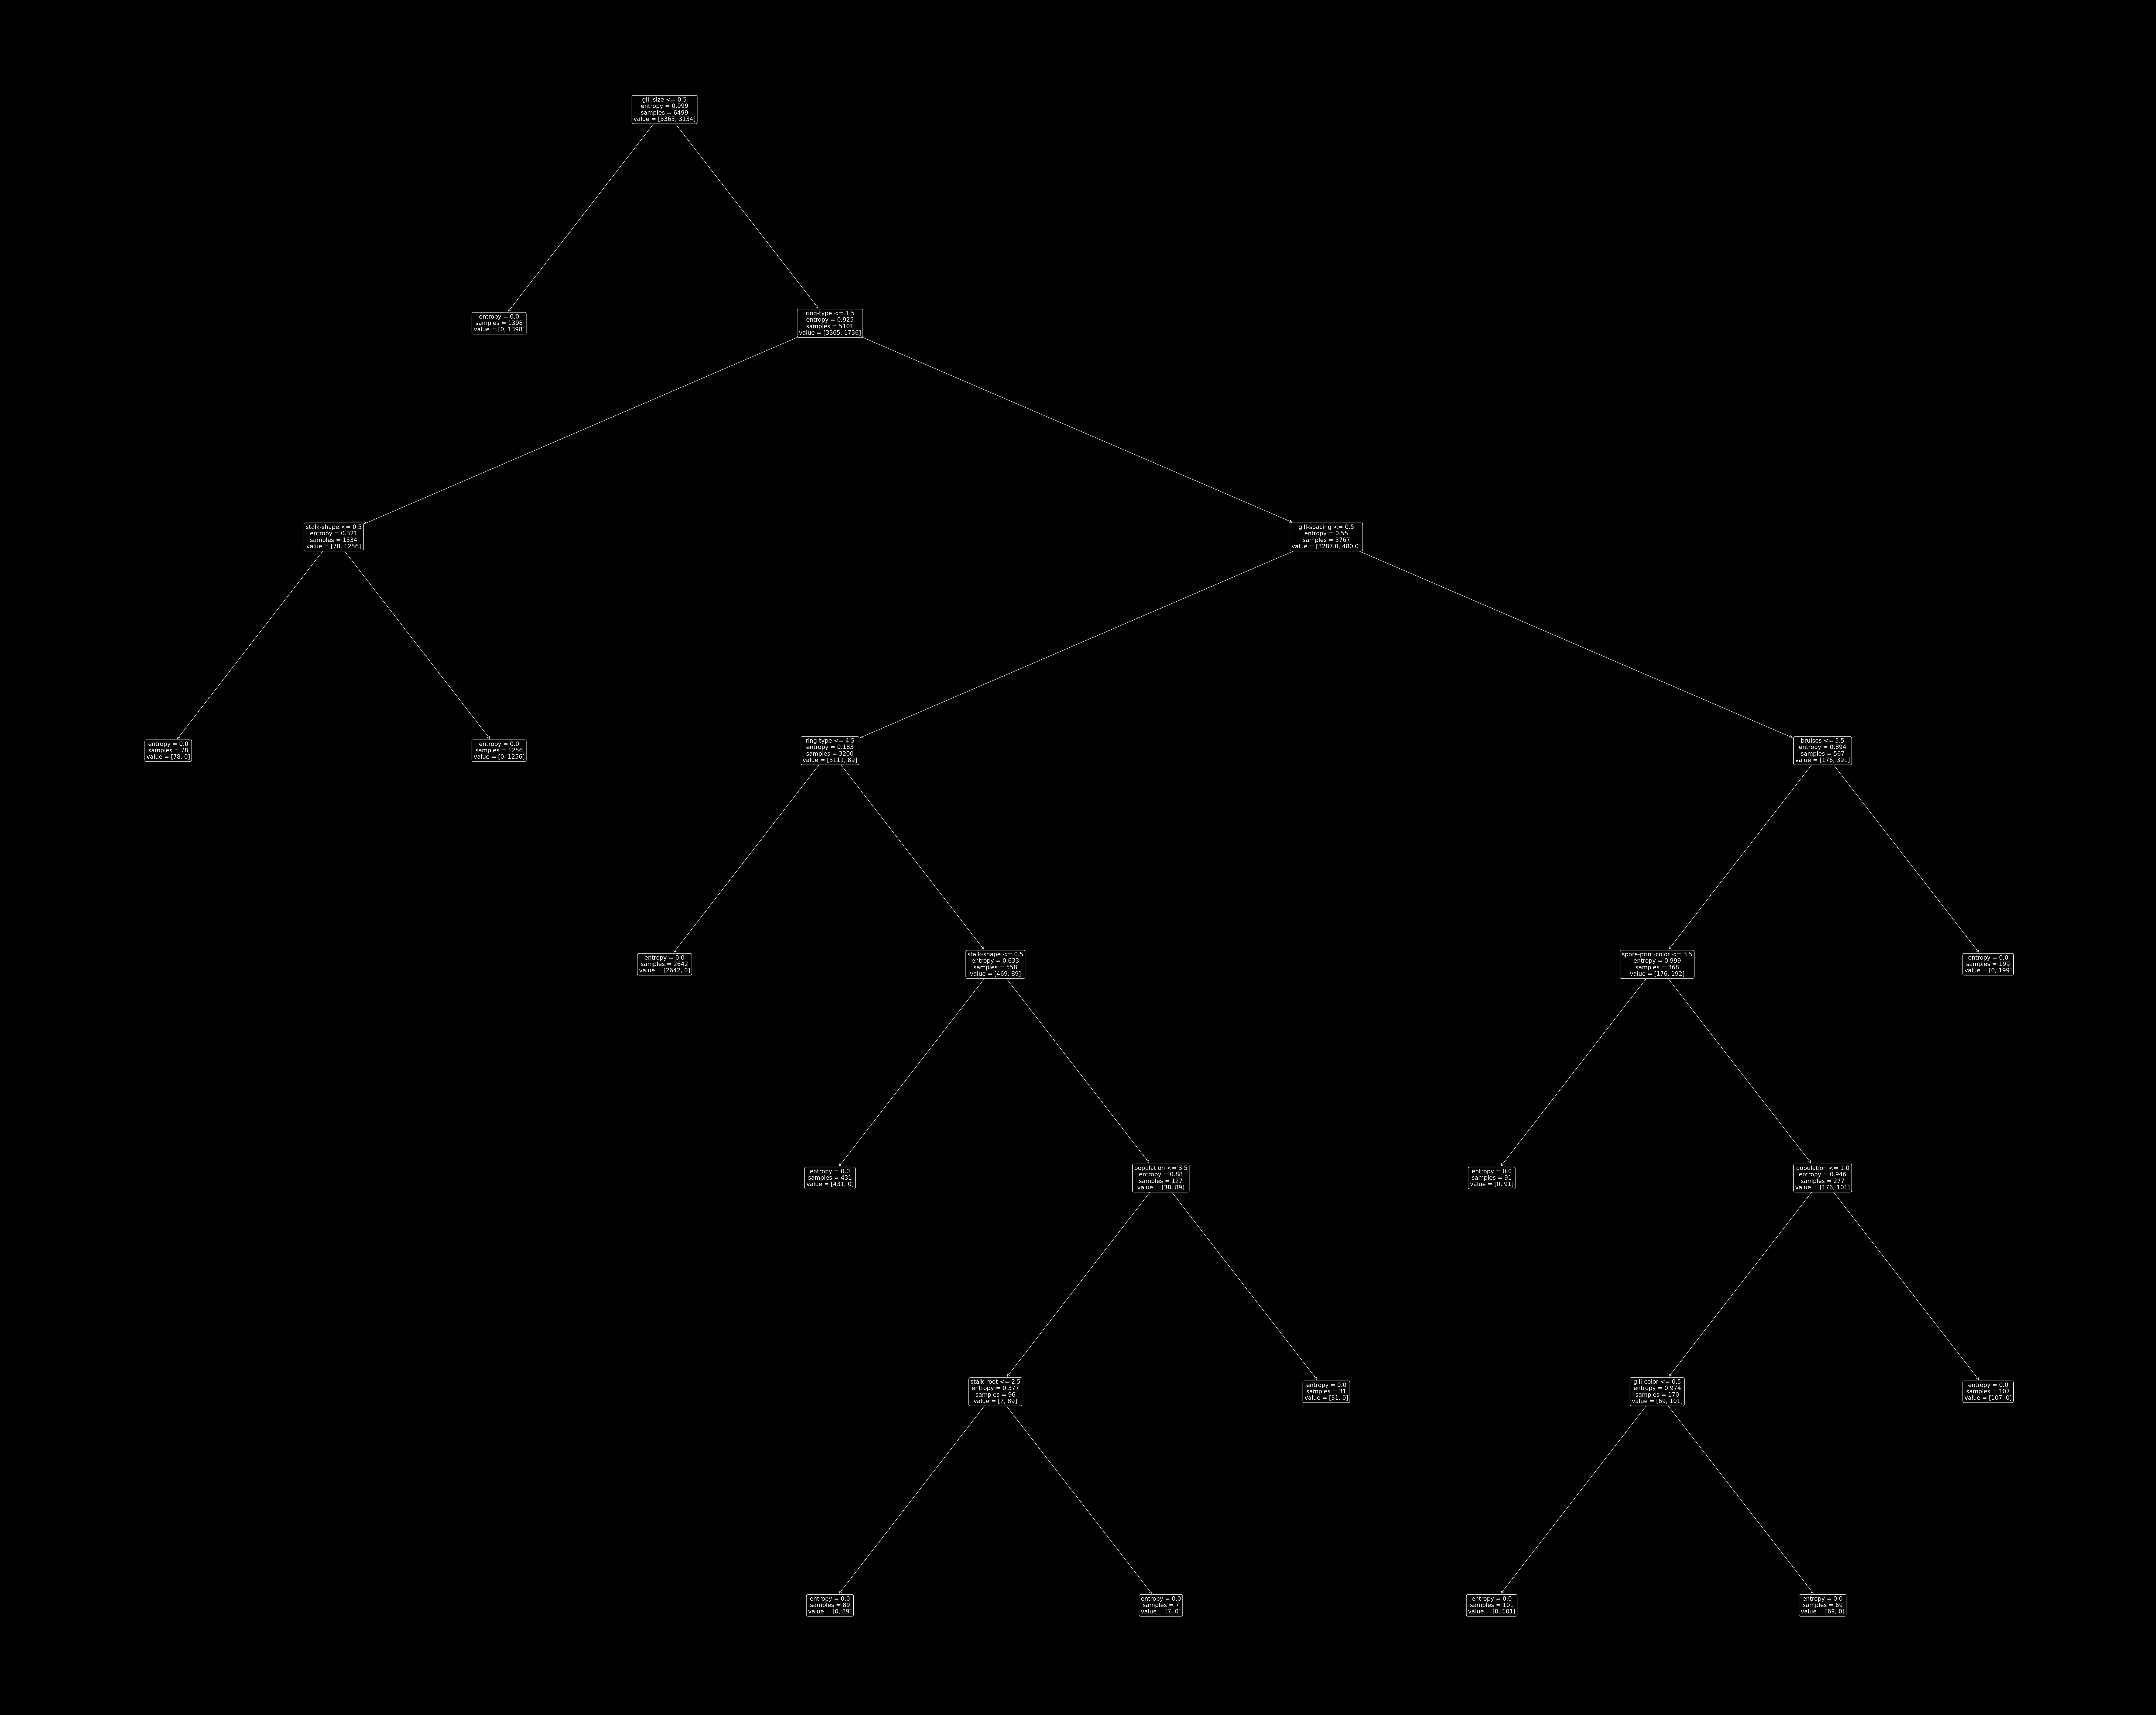

In [ ]:
from sklearn import tree
from matplotlib import pyplot
pyplot.style.use('dark_background')
fig = pyplot.figure(figsize=(100,80))
tree.plot_tree(dtc_entropy, 
    feature_names=ds.columns,  
    fontsize=15, rounded=True,)
fig.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_test = rfc.score(x_test, y_test)
rfc_test

1.0

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625
 
 F1 Score for Random Forest: 1.0 
 Precision Score for Random Forest: 1.0 
 Recall Score for Random Forest: 1.0 
 Confusion Matrix for Random Forest: [[843   0]
 [  0 782]]


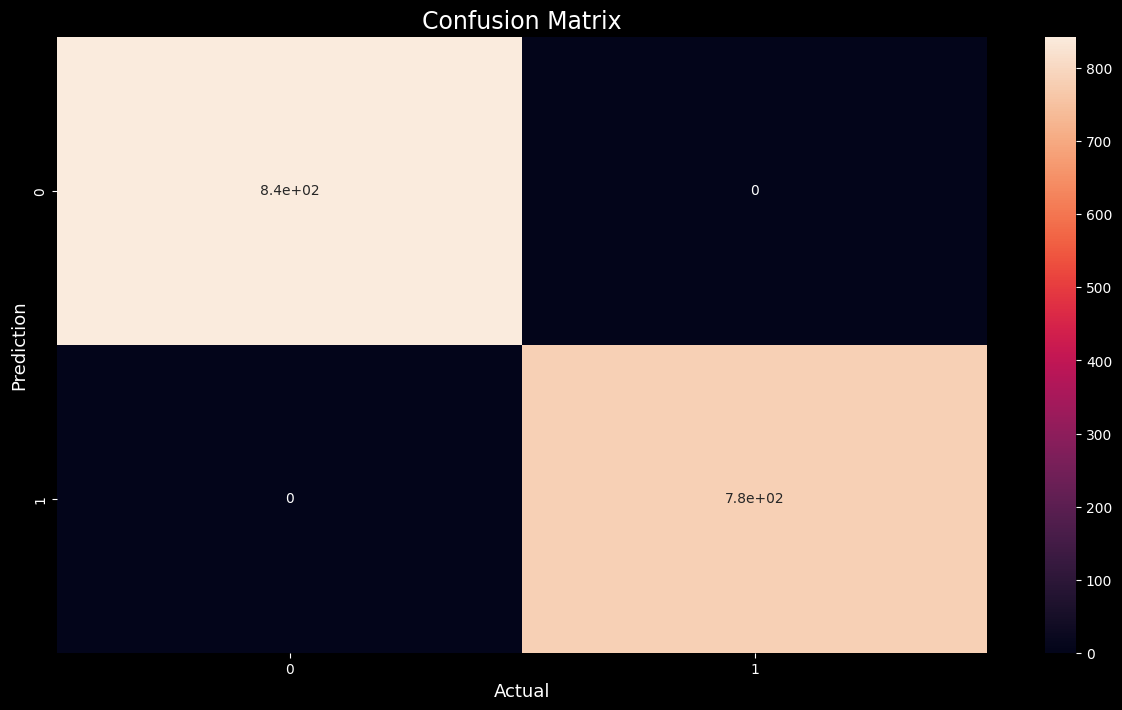

In [ ]:
All("Random Forest",rfc.predict(x_test), y_test)

In [ ]:
scores = [linner_test, ridge_test, lasso_test, logistic_test, knn_test, svc_test, dtc_gini_test, rfc_test]
best_model_index = scores.index(max(scores))
best_model_name = ['Linear Regression', 'Ridge', 'Lasso', 'Logistic Regression', 'KNeighbors Classifier', 'SVM', 'Decision Tree', 'Random Forest'][best_model_index]
print(f"The best model is {best_model_name} with a score of {max(scores)}")

The best model is Decision Tree with a score of 1.0
